In [1]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)

# Define the number of users and products
num_users = 100   # Number of unique users
num_products = 50  # Number of unique products

# Create user IDs and product IDs
user_ids = np.arange(1, num_users + 1)
product_ids = np.arange(1, num_products + 1)

# Generate random user-product interactions
# We'll create a DataFrame with user_id, product_id, and ratings

# Generate a random number of interactions per user (between 10 and 20 interactions)
interactions = []
for user_id in user_ids:
    num_interactions = np.random.randint(10, 20)
    # Select random products for each user
    selected_products = np.random.choice(product_ids, num_interactions, replace=False)
    # Assign random ratings between 1 and 5 for each interaction
    for product_id in selected_products:
        rating = np.random.randint(1, 6)
        interactions.append((user_id, product_id, rating))

# Convert the interactions into a DataFrame
df_interactions = pd.DataFrame(interactions, columns=['user_id', 'product_id', 'rating'])

# Display the first few rows of the dataset
print(df_interactions.head())
print(df_interactions.describe())

# Save the dataset to a CSV file
df_interactions.to_csv('synthetic_ecommerce_data.csv', index=False)


   user_id  product_id  rating
0        1          44       5
1        1          41       2
2        1          47       4
3        1          13       4
4        1          25       4
           user_id   product_id       rating
count  1450.000000  1450.000000  1450.000000
mean     50.597931    25.448966     3.084828
std      29.026042    14.716477     1.417276
min       1.000000     1.000000     1.000000
25%      25.000000    12.000000     2.000000
50%      52.000000    26.000000     3.000000
75%      75.000000    38.000000     4.000000
max     100.000000    50.000000     5.000000


In [2]:
pip install matplotlib seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the dataset
df_interactions = pd.read_csv('synthetic_ecommerce_data.csv')


C:\Users\vsanj\AppData\Local\Temp\ipykernel_9524\2867462262.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df_interactions, palette='viridis')


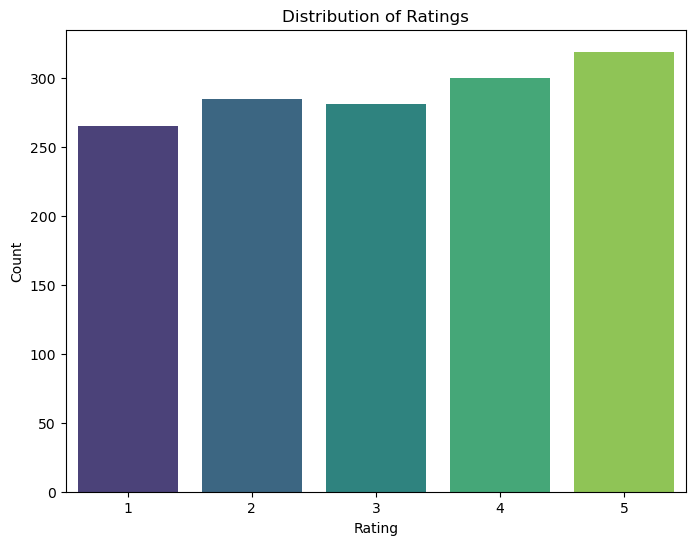

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_interactions, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


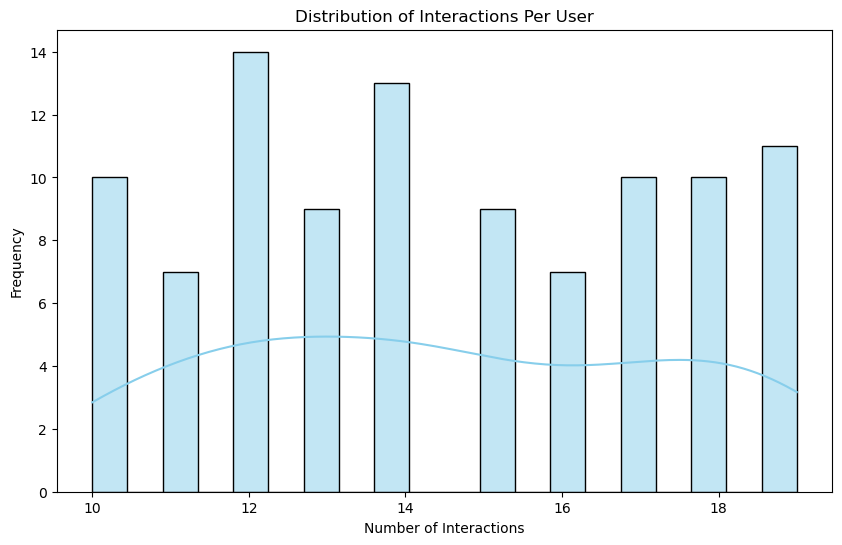

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(df_interactions['user_id'].value_counts(), bins=20, color='skyblue', kde=True)
plt.title('Distribution of Interactions Per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()


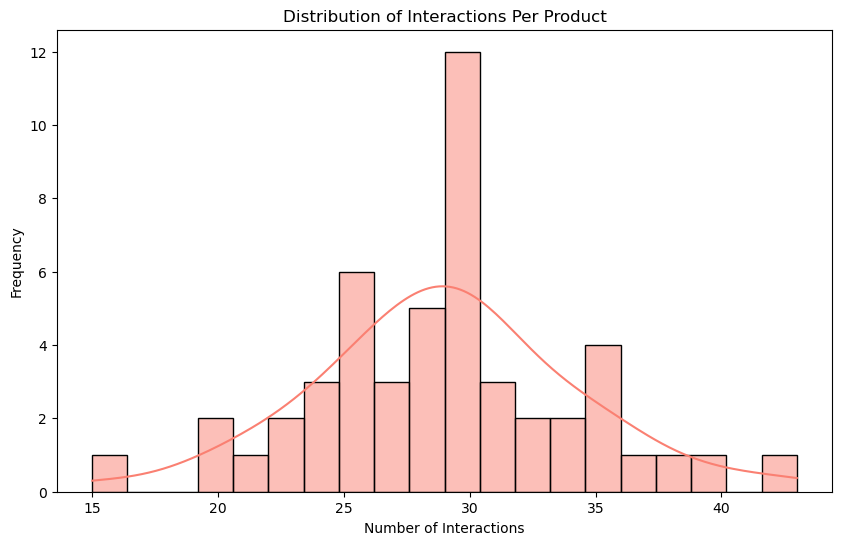

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_interactions['product_id'].value_counts(), bins=20, color='salmon', kde=True)
plt.title('Distribution of Interactions Per Product')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()


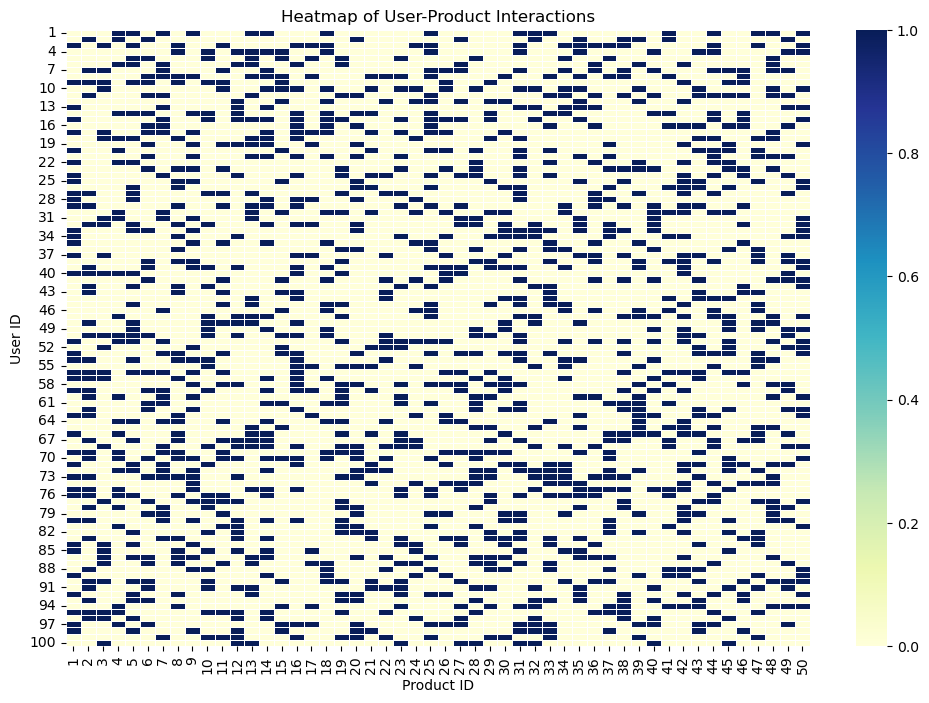

In [8]:
# Pivot the data to create a matrix of user_id vs. product_id
interaction_matrix = df_interactions.pivot_table(index='user_id', columns='product_id', values='rating', aggfunc='count', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap='YlGnBu', cbar=True, linewidths=0.5)
plt.title('Heatmap of User-Product Interactions')
plt.xlabel('Product ID')
plt.ylabel('User ID')
plt.show()


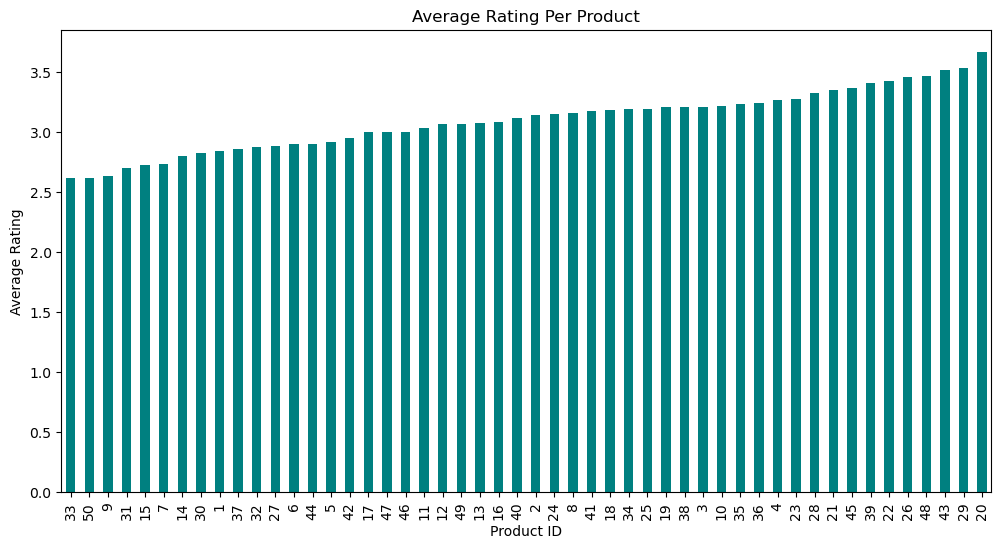

In [9]:
average_rating_per_product = df_interactions.groupby('product_id')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_rating_per_product.plot(kind='bar', color='teal')
plt.title('Average Rating Per Product')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.show()


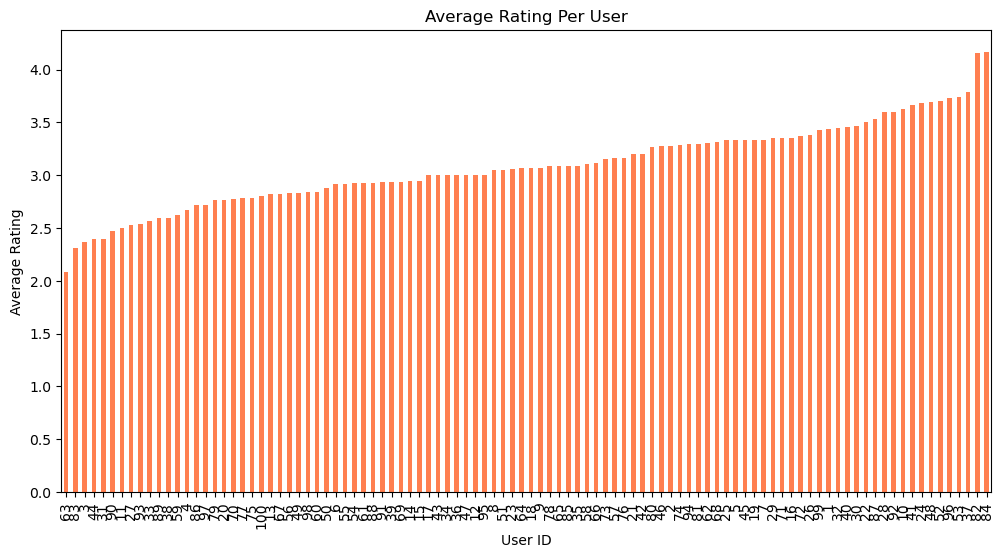

In [10]:
average_rating_per_user = df_interactions.groupby('user_id')['rating'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_rating_per_user.plot(kind='bar', color='coral')
plt.title('Average Rating Per User')
plt.xlabel('User ID')
plt.ylabel('Average Rating')
plt.show()


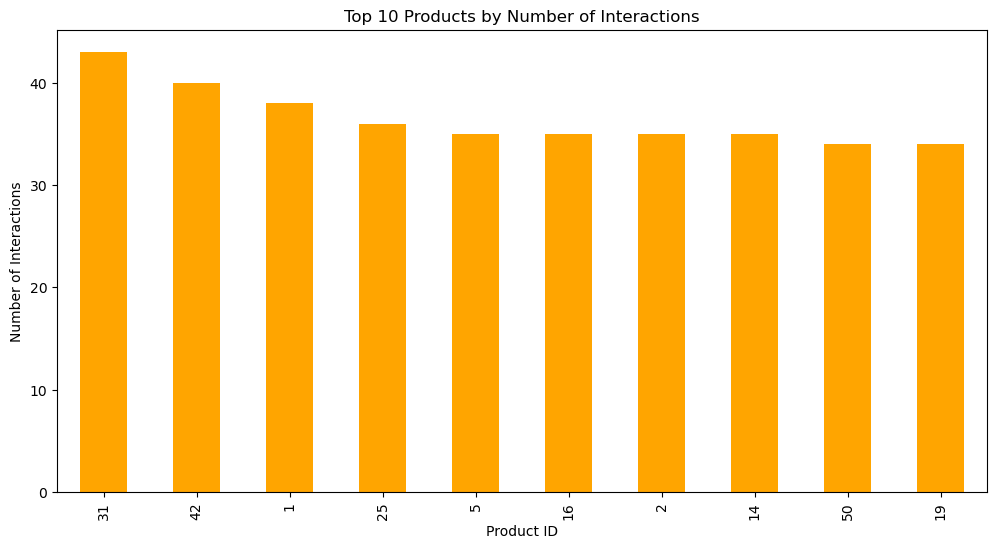

In [11]:
top_products = df_interactions['product_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top 10 Products by Number of Interactions')
plt.xlabel('Product ID')
plt.ylabel('Number of Interactions')
plt.show()


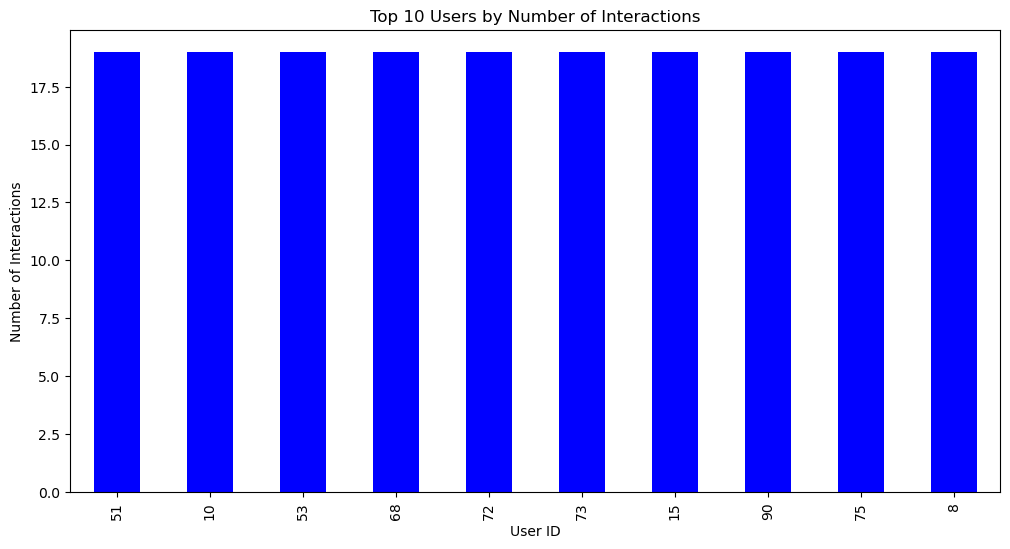

In [12]:
top_users = df_interactions['user_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='blue')
plt.title('Top 10 Users by Number of Interactions')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.show()


##### 